# Lab 0.7 - Manipulating Datasets with Pandas

## Objective
- Install and learn the basics of the `pandas` library.
- Manipulate and analyze datasets, finding basic statistics and adding/removing columns.
- Create data visualizations using `matplotlib`.

## Rubric
- 6 pts - Contains all required components and uses professional language and commenting
- 5 pts - Contains all required components, but uses unprofessional language, commenting, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

# Instructions

Fill in the following code boxes. **Answer the numbered questions in comments next to the code you used to find the answer**.

# Problem 1: Weather Data

We are going to analyze the dataset you created. Use `import pandas as pd` to import the `pandas` library. Then use `df = pd.read_csv("filename.csv")` to create a `DataFrame` called `df`. 

In [73]:
import pandas as pd
df = pd.read_csv("humidity.csv")

### `pandas` method reference

- `df.head(x)` and `df.tail(x)` will give you the first or the last `x` number of rows respectively
- `df.describe()` will give you a **five number summary** of the numeric columns
- `df.max()` and `.min()` will with you the maximum and the minimum of the column repectively
- `df[column]` will give you the column specified
- `df.iloc[index]` will give you the row at a given index
- `df.boxplot` will create a box plot of all numeric columns
- `df.sort_values(by=col, ascending=False)`sorts the values of the col in either ascending or descending order


1. What is the last entry in your table?

In [74]:
df.tail()

,Date,Time,Temperature C,Temperature F,Humidity
14258,2025-02-04,16:07:08,21.9,71.42,21.7
14259,2025-02-04,16:07:09,21.9,71.42,21.7
14260,2025-02-04,16:07:10,21.9,71.42,21.6
14261,2025-02-04,16:07:11,21.9,71.42,21.6
14262,2025-02-04,16:07:12,21.9,71.42,21.6


2. What is the average temperature(either outside or inside) over your 40 hour period. What is the lowest temperature? What is the highest temperature? 

In [75]:
df.describe()

,Temperature C,Temperature F,Humidity
count,14263.000000,14263.000000,14263.000000
mean,21.630814,70.935465,21.998275
std,0.219609,0.395296,0.470512
min,21.300000,70.340000,21.000000
25%,21.500000,70.700000,21.700000
50%,21.600000,70.880000,22.000000
75%,21.700000,71.060000,22.300000
max,24.000000,75.200000,23.200000


3. Create a boxplot of the temperatures.

In [76]:
df.boxplot

<bound method boxplot_frame of              Date      Time  Temperature C   Temperature F  Humidity
0      2025-02-04  10:41:59           24.0           75.20      22.3
1      2025-02-04  10:42:00           24.0           75.20      22.3
2      2025-02-04  10:42:01           24.0           75.20      22.5
3      2025-02-04  10:42:02           24.0           75.20      22.5
4      2025-02-04  10:42:04           24.0           75.20      22.6
...           ...       ...            ...             ...       ...
14258  2025-02-04  16:07:08           21.9           71.42      21.7
14259  2025-02-04  16:07:09           21.9           71.42      21.7
14260  2025-02-04  16:07:10           21.9           71.42      21.6
14261  2025-02-04  16:07:11           21.9           71.42      21.6
14262  2025-02-04  16:07:12           21.9           71.42      21.6

[14263 rows x 5 columns]>

4. Create a plot of temperature over time with `matplotlib`. 

Import the library with `import matplotlib.pyplot as plt`. The `plot()` method creates a line graphs of temperature over time. Use `plt.plot(df['x_col'],df['y_col'],marker='h')` then `plt.show()` to create your plot of temperature over time. 

Before `plt.show()`, add the following methods to modify your graph. Remember, **good graphs always have axis labels, a title, clear units etc.**

```
plt.xlabel('') # labels the x-axis
plt.ylabel('') # labels the y-axis
plt.title('') # adds a graph title
plt.grid() # adds gridlines
plt.legend() # adds a legend
plt.xticks(rotation=90) # rotates the x-axis tick lables
plt.yticks(rotation=90) # rotates the y-axis tick lables
```

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Time'],df[' Temperature F'],marker='h', label="Temperature F")
plt.plot(df['Time'],df['Temperature C'],marker='h', label="Temperature C")
plt.plot(df['Time'],df['Humidity'],marker='h', label="Humidity")
plt.grid()
plt.xlabel('2025-2-04')
plt.ylabel('Temperature')
plt.title('Weather')
plt.legend()
plt.show()

5. Define a new column called `kelvin` which is your `celsius` column + 273.15. 

6. Get the record(row) at 2:30PM 


In [ ]:
df.iloc[9305]

Date              2025-02-04
Time                14:30:03
Temperature C           21.7
 Temperature F         71.06
Humidity                22.6
Name: 9305, dtype: object

# Problem 2: Population Data

In this example we will fetch data about countries and their predicted populations from [Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population).

I have done the web scraping and creation of a `DataFrame`,`df_a`.

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

tbody = soup.find_all("tbody")
tr = tbody[0].find_all("tr")
arr = []
mat = []
for t in tr:
    lst = t.text.split("\n")
    for l in lst:
        if l == "":
            if arr != []:
                arr = arr[0:2] + arr[2::2]
                mat.append(arr)
                arr = []
        else:
            try: 
                arr.append(int(l.lstrip('\xa0').replace(",","")))
            except ValueError:
                arr.append(str(l.lstrip('\xa0').replace(",","")))
titles = mat[0]
titles[0] = "countries"
mat = mat[1:]
df_a = pd.DataFrame.from_records(mat, columns=titles) 


1. A 5 number summary of `df_a`

In [ ]:
df_a.describe()

,2024,2030,2100
count,2.580000e+02,2.580000e+02,2.580000e+02
mean,1.409838e+08,1.483421e+08,1.758736e+08
std,6.587727e+08,6.906787e+08,8.173571e+08
min,5.260000e+02,5.610000e+02,1.237000e+03
25%,5.999040e+05,6.259820e+05,6.768595e+05
50%,6.893438e+06,7.254900e+06,8.156020e+06
75%,3.483818e+07,3.830878e+07,5.201191e+07
max,8.118836e+09,8.546141e+09,1.034932e+10


2. How is the `DataFrame` currently indexed? If it is not already, make the `countries` column the index.

In [ ]:
df_a = df_a.set_index('countries')

3. What is the largest population listed for 2030?

In [ ]:
df_a.sort_values(by=2030, ascending=False)

,2024,2030,2100
countries,,,
World,8118836000,8546141000,10349323000
Asia,4785060000,4958807000,4674249000
East Asia and Southeast Asia,2354122000,2372658000,1652016000
Central Asia and South Asia,2128585000,2258687000,2559659000
South Asia,2049313000,2173354000,2433583000
...,...,...,...
Montserrat,4372,4301,2575
Falkland Islands,3803,3869,2773
Tokelau,1915,2046,2805


4. What was the population of Austria from now to 2100?

In [ ]:
df_a.loc['Austria']


2024    9120813
2030    9080346
2100    7399328
Name: Austria, dtype: int64

5. What will the population be of France in 2030?

In [ ]:
df_a.loc['France']

2024    64881830
2030    65543452
2100    60851673
Name: France, dtype: int64

6. What 5 entries will have the highest population in 2100? Display their records.

In [ ]:
df_a.nlargest(5, 2100)


,2024,2030,2100
countries,,,
World,8118836000,8546141000,10349323000
Asia,4785060000,4958807000,4674249000
Africa,1494994000,1710666000,3924421000
Sub-Saharan Africa,1226534000,1417346000,3442347000
Central Asia and South Asia,2128585000,2258687000,2559659000


7. What was country with the smallest population in 2024?

In [ ]:
df_a.sort_values(by=2024, ascending=True)

,2024,2030,2100
countries,,,
Vatican City,526,561,1237
Tokelau,1915,2046,2805
Niue,1935,1948,2225
Falkland Islands,3803,3869,2773
Montserrat,4372,4301,2575
...,...,...,...
South Asia,2049313000,2173354000,2433583000
Central Asia and South Asia,2128585000,2258687000,2559659000
East Asia and Southeast Asia,2354122000,2372658000,1652016000


8. Create a plot with `plot()` to compare the population of Austria, Germany, United States, and France from 2024-2100. Your graph needs to include a  proper title, axis labels, and legend.

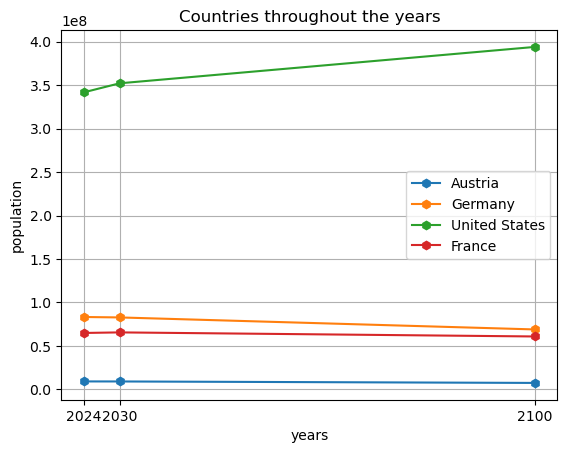

In [83]:
import matplotlib.pyplot as plt
plt.plot(df_a.loc['Austria'],marker='h', label="Austria")
plt.plot(df_a.loc['Germany'],marker='h', label="Germany")
plt.plot(df_a.loc['United States'],marker='h', label="United States")
plt.plot(df_a.loc['France'],marker='h', label="France")
plt.xticks([2024, 2030, 2100], labels=["2024", "2030", "2100"])
plt.grid()
plt.xlabel('years')
plt.ylabel('population')
plt.title('Countries throughout the years')
plt.legend()
plt.show()
